# Plant Dataset

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"sidhsatam","key":"5d2a82f91cf79b90f0b970d302cbabef"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d vbookshelf/v2-plant-seedlings-dataset --force

100% 3.19G/3.19G [01:14<00:00, 16.7MB/s]
100% 3.19G/3.19G [01:14<00:00, 46.1MB/s]


In [0]:
import zipfile
with zipfile.ZipFile("v2-plant-seedlings-dataset.zip","r") as zip_ref:
    zip_ref.extractall("plant-seedlings-data")

In [0]:
!rm -rf /content/plant-seedlings-data/nonsegmentedv2

In [0]:
import os
labels = os.listdir("plant-seedlings-data")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir("plant-seedlings-data/"+label))))

No. of labels: 12
-----------------
Charlock, 452 files
Maize, 257 files
Loose Silky-bent, 762 files
Common wheat, 253 files
Fat Hen, 538 files
Scentless Mayweed, 607 files
Cleavers, 335 files
ShepherdΓÇÖs Purse, 274 files
Sugar beet, 463 files
Black-grass, 309 files
Common Chickweed, 713 files
Small-flowered Cranesbill, 576 files


In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
path = '/content/plant-seedlings-data'
size = 224
bs = 64

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True), valid_pct=0.2, size=size, bs=bs)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Charlock,Charlock,Charlock,Charlock,Charlock
Path: /content/plant-seedlings-data;

Valid: LabelList (1107 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Scentless Mayweed,Fat Hen,Maize,Small-flowered Cranesbill,Common Chickweed
Path: /content/plant-seedlings-data;

Test: None

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learner = create_cnn(data, models.resnet34, metrics=[accuracy], callback_fns=ShowGraph)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


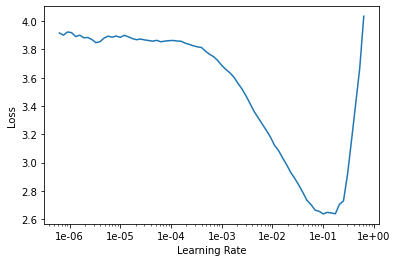

In [0]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.468136,0.751828,0.764228,01:12
1,0.955784,0.565835,0.818428,01:11
2,0.715286,0.405183,0.873532,01:11
3,0.509045,0.378537,0.872629,01:11
4,0.402734,0.262923,0.920506,01:11
5,0.311062,0.217064,0.925023,01:11
6,0.256549,0.192216,0.934959,01:11
7,0.231838,0.197817,0.939476,01:10


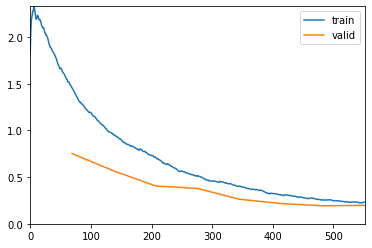

In [0]:
learner.fit_one_cycle(8, max_lr=slice(1e-2)) # take the step before minima(1e-1)

In [0]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


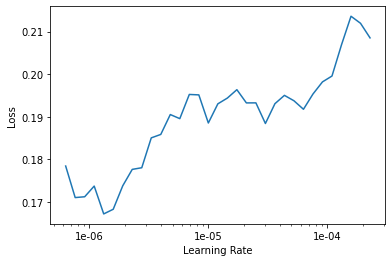

In [0]:
learner.lr_find()
learner.recorder.plot() #chose epoch at or before the minima

epoch,train_loss,valid_loss,accuracy,time
0,0.187206,0.183210,0.938573,01:12
1,0.155895,0.162390,0.950316,01:12
2,0.130818,0.160427,0.952123,01:11
3,0.118222,0.166180,0.949413,01:12


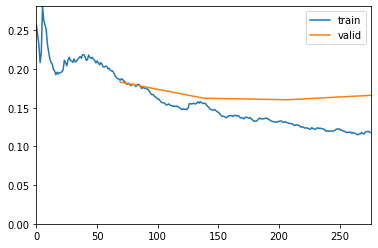

In [0]:
learner.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4)) #if accuracy not increassed much, increase lr ie from e-5 to e-4

In [0]:
learner.save('my_best_weights')

In [0]:
learner.load('my_best_weights')

# Malaria Dataset

In [0]:
!wget  --backups=1 -q https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
path = '/content/cell_images'
size = 128
bs = 256

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True), valid_pct=0.2, size=size, bs=bs)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (22047 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: /content/cell_images;

Valid: LabelList (5511 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: /content/cell_images;

Test: None

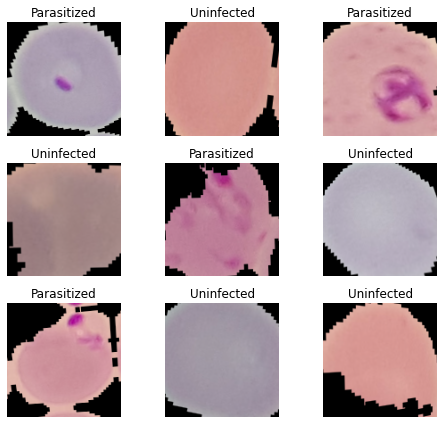

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy], callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


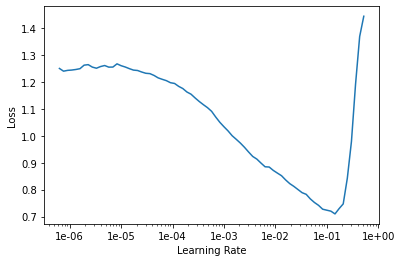

In [0]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.216778,0.213223,0.952822,01:13
1,0.184292,0.180543,0.933043,01:13
2,0.162246,0.146004,0.958810,01:13
3,0.135140,0.137773,0.946471,01:13
4,0.117264,0.088089,0.968608,01:13
5,0.108663,0.083780,0.970241,01:14


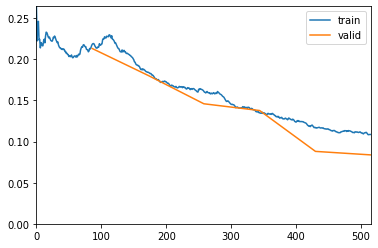

In [0]:
learner.fit_one_cycle(6, max_lr=slice(1e-1)) # take the step before minima(1e-1)

In [0]:
learner.save('malaria_freeze')

In [0]:
learner.load('malaria_freeze')

Learner(data=ImageDataBunch;

Train: LabelList (22047 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: /content/cell_images;

Valid: LabelList (5511 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: /content/cell_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   

In [0]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


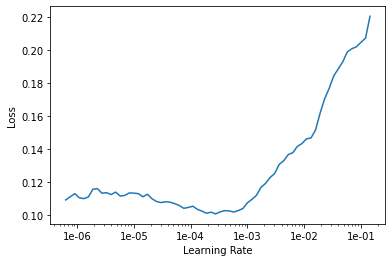

In [0]:
learner.lr_find()
learner.recorder.plot() #chose epoch at or before the minima

epoch,train_loss,valid_loss,accuracy,time
0,0.079031,0.074357,0.972419,01:14
1,0.088159,0.095389,0.965705,01:14
2,0.089208,0.075004,0.972963,01:15
3,0.083906,0.069700,0.974233,01:16
4,0.076547,0.064911,0.975685,01:17
5,0.074571,0.063806,0.976774,01:16


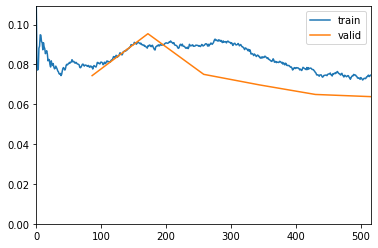

In [0]:
learner.fit_one_cycle(6, max_lr=slice(1e-4, 1e-3)) #if accuracy not increassed much, increase lr ie from e-5 to e-4

In [0]:
learner.save('malaria_unfreeze')

In [0]:
learner.load('malaria_unfreeze')